In [1]:
import numpy as np
import porespy as ps
import scipy.ndimage as spim
import matplotlib.pyplot as plt
import skimage

Fills regions of an image with one value based on the original values in the region

Create image and variables:

--------------------------------------------------------------------------------
RSA: Adding spheres of size 5
Initial volume fraction: 0.0
Dilating foreground features by sphere radius
Regenerating free_sites after 497 iterations
Regenerating free_sites after 602 iterations
Regenerating free_sites after 618 iterations
Number of spheres inserted: 618
Final volume fraction: 0.4738


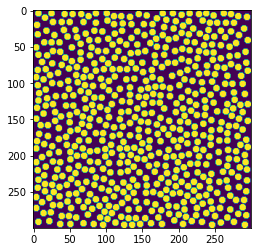

In [2]:
im = np.zeros([300, 300])
im = ps.generators.RSA(im, radius=5, volume_fraction=0.9)
plt.imshow(im)
regions=None
mode="max"

Apply filters:

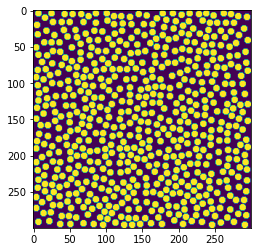

In [3]:
x = ps.filters.flood(im, regions=None, mode="max")
plt.imshow(x)